In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io

In [3]:
oxy_data=scipy.io.loadmat('oxy_ts.mat')

In [4]:
oxy_data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Feb 24 11:53:59 2015',
 '__version__': '1.0',
 'names': array([[array(['L Frontal Sup'], 
       dtype='<U13'),
         array(['L Frontal Med Orbital'], 
       dtype='<U21'),
         array(['L Cingulum Post'], 
       dtype='<U15'),
         array(['R Amygdala'], 
       dtype='<U10')]], dtype=object),
 'ts_roi_oxytocin': array([[-3.77557662, -5.77365114, -9.57021654, -0.9384245 ],
        [-3.47519884, -5.38728432, -9.11882644, -0.66167455],
        [-2.91696258, -4.65462627, -8.26556558, -0.12829601],
        ..., 
        [ 1.29530079,  2.13907671,  2.70376582,  6.80861642],
        [ 1.65333978,  2.34770588,  2.78201873,  8.02016985],
        [ 1.8444468 ,  2.4606193 ,  2.81709313,  8.66115912]]),
 'ts_roi_placebo': array([[-6.0988565 , -4.76972472, -4.16927416,  2.33500703],
        [-5.73770686, -4.49071092, -3.82386596,  2.22337126],
        [-5.07860676, -3.97045432, -3.18317154,  2.0

In [5]:
oxy=oxy_data['ts_roi_oxytocin']
pla=oxy_data['ts_roi_placebo']
oxy_std=oxy.std(axis=0)
pla_std=pla.std(axis=0)
print(pla_std,oxy_std)

[ 1.8814355   1.96666159  2.64737154  1.94482918] [ 1.64816956  2.36383337  2.98231705  4.15789336]


0 1
(0.68388270700187115, 1.4912616612868746e-103)
(0.46090645729966279, 2.3729767978644057e-40)
[-6.9482003   7.4453987   0.93864304]
[-7.19289222  7.00660689  0.41735036]
0 2
(0.38306376416564603, 2.219923957268285e-27)
(0.20913980864007511, 8.6693810238164526e-09)
[-7.69524758  5.80174274 -0.36771545]
[-6.68053585  6.40898484  0.41443386]
0 3
(-0.19021606238943484, 1.751440698125031e-07)
(-0.22869722498865772, 2.8428914112961589e-10)
[-6.76497922  6.17734644  0.05061596]
[-4.13043931+18.79921841j -4.13043931-18.79921841j  0.82503217 +0.j        ]
1 2
(0.52082398036500399, 6.7969526968412542e-53)
(0.35124009577469739, 5.3795257428312586e-23)
[-8.3169223   6.51009732 -1.17857363]
[ 6.81795725 -7.01412104 -0.38669954]
1 3
(-0.22180762502352125, 9.8296104717239103e-10)
(-0.067313664006221144, 0.066679429662996045)
[-6.96860062  5.82442862 -0.79006618]
[-1.10356739+8.43846376j -1.10356739-8.43846376j -0.34354824+0.j        ]
2 3
(-0.19961705385845407, 4.0806705679661127e-08)
(-0.26921453

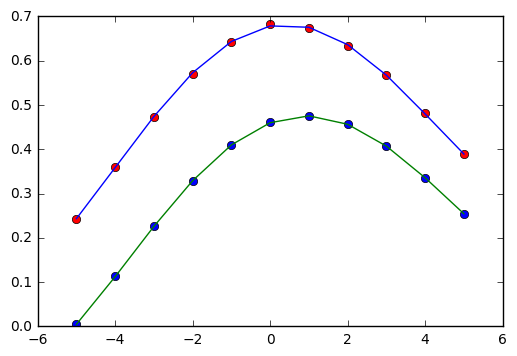

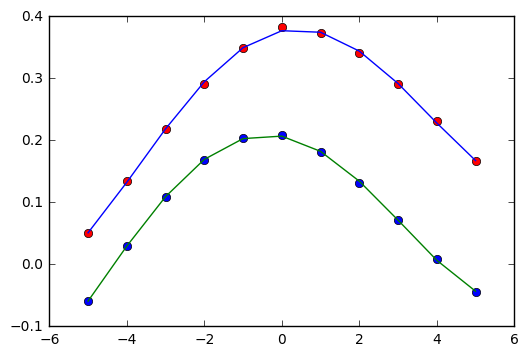

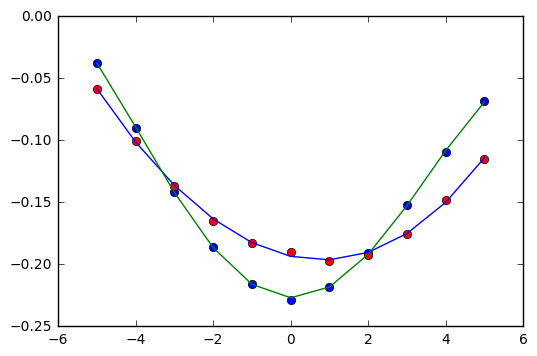

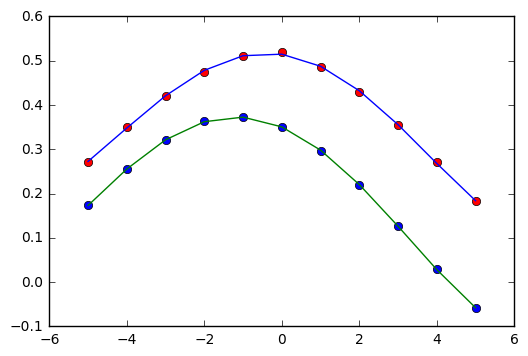

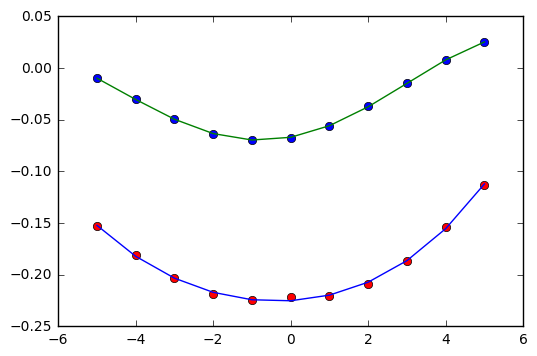

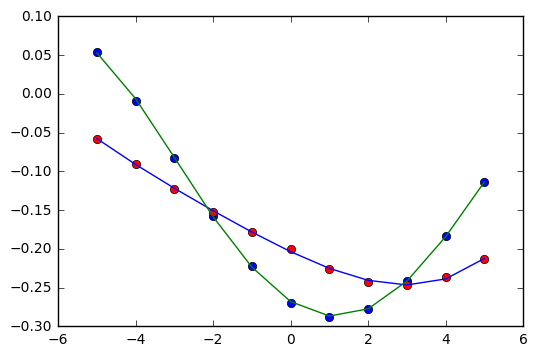

In [6]:
import itertools as it
from scipy.stats import pearsonr
for i,j in it.combinations(range(oxy.shape[1]),2):
    print(i,j)
    print(pearsonr(oxy[:,i],oxy[:,j]))
    print(pearsonr(pla[:,i],pla[:,j]))
    r_oxy=[pearsonr(oxy[:,i],np.roll(oxy[:,j],t))[0] for t in range(-5,6)]
    r_pla=[pearsonr(pla[:,i],np.roll(pla[:,j],t))[0] for t in range(-5,6)]
    t=np.arange(-5,6)
    p_oxy=np.polyfit(t,r_oxy,4)
    pd_oxy=np.polyder(p_oxy,1)
    roots_oxy=np.roots(pd_oxy)
    p_pla=np.polyfit(t,r_pla,4)
    pd_pla=np.polyder(p_pla,1)
    roots_oxy=np.roots(pd_oxy)
    roots_pla=np.roots(pd_pla)
    print(roots_pla)
    print(roots_oxy)
    rfunc_oxy=np.poly1d(p_oxy)
    rfit_oxy=rfunc_oxy(t)
    rfunc_pla=np.poly1d(p_pla)
    rfit_pla=rfunc_pla(t)
    plt.figure()
    plt.plot(t,r_pla,"ob")
    plt.plot(t,r_oxy,"or")
    plt.plot(t,rfit_oxy)
    plt.plot(t,rfit_pla)